In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

In [60]:
import yfinance as yfin

yfin.pdr_override()

df = web.get_data_yahoo("TSLA", start="2010-01-01", end=dt.date.today())
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [61]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96511400


In [62]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [64]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3295,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96511400


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3300 non-null   datetime64[ns]
 1   Open       3300 non-null   float64       
 2   High       3300 non-null   float64       
 3   Low        3300 non-null   float64       
 4   Close      3300 non-null   float64       
 5   Adj Close  3300 non-null   float64       
 6   Volume     3300 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 180.6 KB


In [66]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3.300000e+03
mean,65.312011,66.772735,63.728987,65.289858,65.289858,9.614308e+07
std,98.512557,100.750978,96.025704,98.423202,98.423202,8.109632e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.941833,10.139500,9.718333,9.864666,9.864666,4.467338e+07
50%,16.652334,16.896667,16.406334,16.665334,16.665334,7.924500e+07
75%,53.115334,54.700667,51.858166,53.329332,53.329332,1.226929e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [67]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


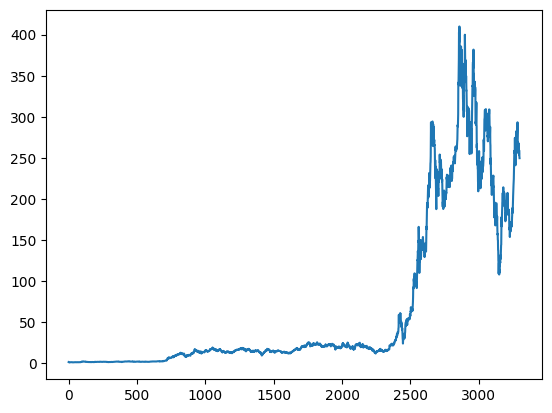

In [68]:
plt.plot(df.Close)

In [69]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3295    213.9104
3296    214.7692
3297    215.5630
3298    216.2449
3299    216.9374
Name: Close, Length: 3300, dtype: float64

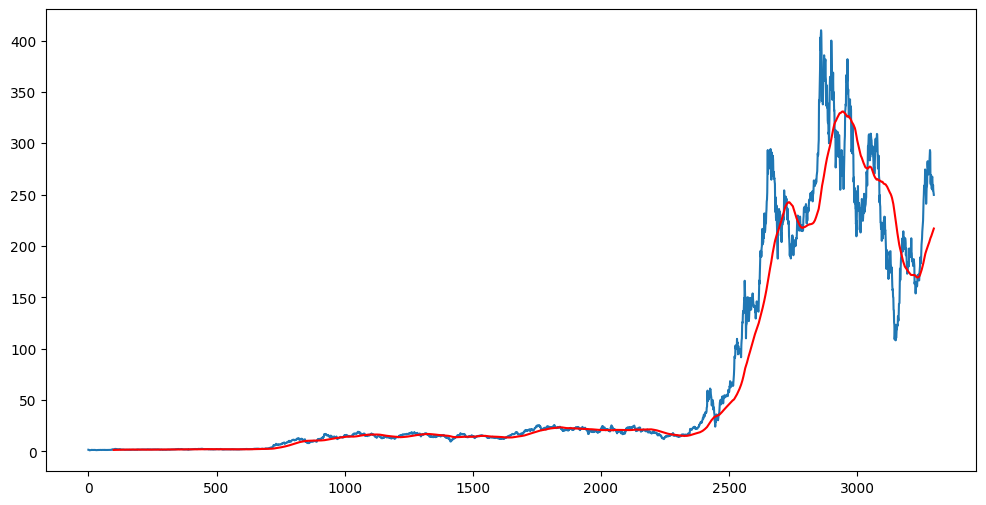

In [70]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [71]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3295    195.27450
3296    195.54615
3297    195.71870
3298    195.87500
3299    196.01330
Name: Close, Length: 3300, dtype: float64

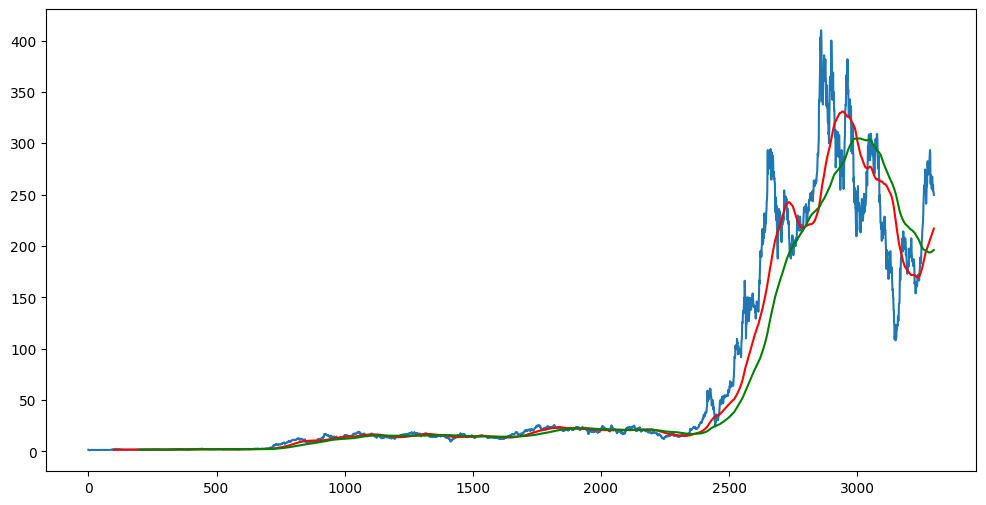

In [72]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [73]:
df.shape

(3300, 5)

In [74]:
# Splitting the dataset into 70% as training data and rest 30% as testing data

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_test.shape)

(2310, 1)
(990, 1)


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [76]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.54114302],
       [0.5577194 ],
       [0.56828275]])

In [77]:
data_training_array.shape

(2310, 1)

In [78]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [79]:
x_train.shape

(2210, 100, 1)

In [80]:
y_train.shape

(2210,)

In [81]:
# ML Model

In [82]:
model = Sequential()
model.add(LSTM (units=50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM (units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM (units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM (units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [84]:
model.compile(optimizer='adam',loss='mean_squared_error')
epochs=50
model.fit(x_train, y_train, epochs = epochs)

Epoch 1/50
70/70 [==============================] - 13s 137ms/step - loss: 0.0550
Epoch 2/50
70/70 [==============================] - 10s 141ms/step - loss: 0.0107
Epoch 3/50
70/70 [==============================] - 10s 140ms/step - loss: 0.0109
Epoch 4/50
70/70 [==============================] - 10s 138ms/step - loss: 0.0093
Epoch 5/50
70/70 [==============================] - 11s 151ms/step - loss: 0.0089
Epoch 6/50
70/70 [==============================] - 10s 149ms/step - loss: 0.0089
Epoch 7/50
70/70 [==============================] - 13s 179ms/step - loss: 0.0093
Epoch 8/50
70/70 [==============================] - 10s 147ms/step - loss: 0.0075
Epoch 9/50
70/70 [==============================] - 10s 144ms/step - loss: 0.0076
Epoch 10/50
70/70 [==============================] - 10s 144ms/step - loss: 0.0073
Epoch 11/50
70/70 [==============================] - 10s 141ms/step - loss: 0.0069
Epoch 12/50
70/70 [==============================] - 11s 156ms/step - loss: 0.0066
Epoch 13/50
7

In [85]:
print(tf.version.VERSION)

2.13.0


In [86]:
model.save('keras_model.h5')

C:\Users\zenit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [87]:
data_test.head()

,Close
2310,15.000667
2311,14.712000
2312,15.305333
2313,15.163333
2314,15.452667


In [88]:
data_training.tail(100)

,Close
2210,18.403999
2211,17.894667
2212,17.846666
2213,17.758667
2214,18.224001
...,...
2305,14.333333
2306,14.272000
2307,14.372667
2308,14.780667


In [89]:
past_100_days = data_training.tail(100)

In [90]:
final_df = past_100_days.append(data_test, ignore_index=True)

C:\Users\zenit\AppData\Local\Temp\ipykernel_7656\1626534528.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test, ignore_index=True)


In [91]:
final_df.head()

,Close
0,18.403999
1,17.894667
2,17.846666
3,17.758667
4,18.224001


In [92]:
input_data = scaler.fit_transform(final_df)

In [93]:
input_data

array([[0.0162614 ],
       [0.0149818 ],
       [0.0148612 ],
       ...,
       [0.60780192],
       [0.60174723],
       [0.59735067]])

In [94]:
input_data.shape

(1090, 1)

In [95]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [96]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(990, 100, 1)
(990,)


In [97]:
# Making predictions

In [98]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 2s 40ms/step


In [99]:
y_predicted.shape

(990, 1)

In [100]:
y_test

array([0.00771115, 0.00698592, 0.00847656, 0.00811981, 0.00884671,
       0.00947479, 0.01141095, 0.01120494, 0.01109273, 0.01069243,
       0.01102405, 0.01080633, 0.01132721, 0.01032563, 0.0104278 ,
       0.00740967, 0.00832918, 0.01065056, 0.01057854, 0.01036751,
       0.01100731, 0.01074603, 0.0090544 , 0.00878642, 0.00983992,
       0.01023016, 0.01098051, 0.01101568, 0.01154327, 0.01306238,
       0.01321815, 0.01352968, 0.0139015 , 0.01306071, 0.01248288,
       0.01283125, 0.01268051, 0.02021747, 0.0249825 , 0.02491216,
       0.02298772, 0.02278506, 0.02276998, 0.02250033, 0.02319708,
       0.02315521, 0.02472289, 0.02622358, 0.02649156, 0.0278231 ,
       0.02863374, 0.02799393, 0.0285366 , 0.02900891, 0.02864378,
       0.03023995, 0.02901728, 0.02945442, 0.02580487, 0.02635757,
       0.02511481, 0.02551176, 0.02528565, 0.02611137, 0.02633413,
       0.02580319, 0.02535767, 0.02628221, 0.02689186, 0.02845118,
       0.02909767, 0.03026674, 0.03005069, 0.03392133, 0.03350

In [101]:
y_predicted

array([[0.04716972],
       [0.04715386],
       [0.04714987],
       [0.04715705],
       [0.0471786 ],
       [0.04721439],
       [0.0472638 ],
       [0.04732725],
       [0.04740641],
       [0.04750261],
       [0.04761738],
       [0.04774904],
       [0.04789641],
       [0.04805484],
       [0.04822049],
       [0.04838666],
       [0.04854929],
       [0.04869804],
       [0.04882148],
       [0.04891446],
       [0.04897481],
       [0.04900044],
       [0.04899302],
       [0.04895601],
       [0.04889357],
       [0.04880783],
       [0.04870269],
       [0.04858318],
       [0.04845592],
       [0.04832757],
       [0.04820415],
       [0.04809463],
       [0.04800507],
       [0.04794201],
       [0.04791114],
       [0.04791462],
       [0.04795241],
       [0.04802245],
       [0.04811865],
       [0.04824105],
       [0.04839781],
       [0.0485988 ],
       [0.04885063],
       [0.0491555 ],
       [0.04951102],
       [0.04991192],
       [0.05034912],
       [0.050

In [102]:
scaler.scale_

array([0.00251232])

In [103]:
scale_factor = 1/0.02099517
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

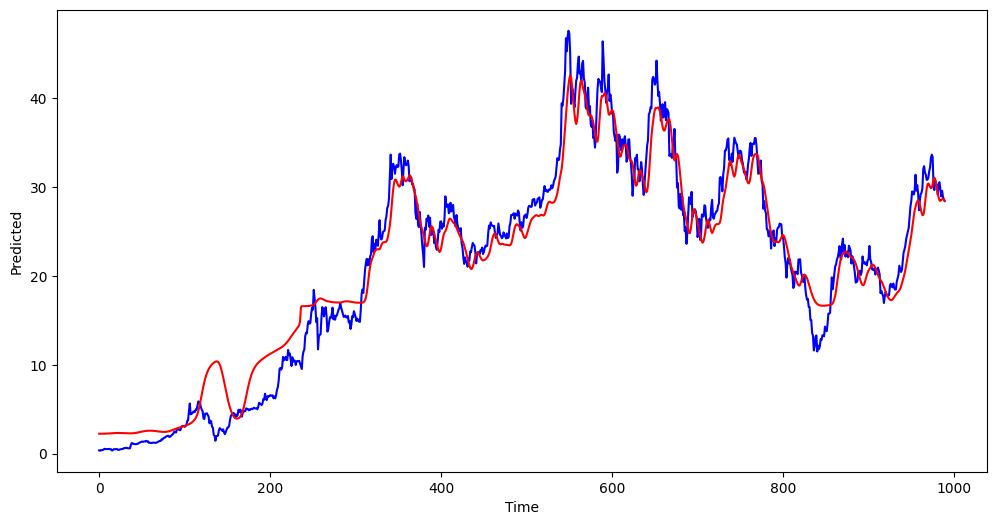

In [104]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Predicted')
plt.show()